**IMPORT RELEVANT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import glob
import os
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

**IMPORT DATA**

In [2]:
path = '/kaggle/input/march-machine-learning-mania-2024-1'
files = glob.glob(os.path.join(path, "*.csv"))

engine = create_engine('sqlite://', echo=False)

dfs = {}

for file in files:
    file_name = os.path.basename(file)[:-4]    
    df = pd.read_csv(file, encoding='ISO-8859-1')
    dfs[file_name] = df
    df.to_sql(file_name, con=engine, index=False, if_exists='replace')

**EDA**

In [ ]:
for key in dfs:
    print(f"{key}:{dfs[key].shape}")

Conferences:(51, 2)
sample_submission:(126, 5)
WNCAATourneyDetailedResults:(827, 34)
WRegularSeasonCompactResults:(131587, 8)
MNCAATourneySeedRoundSlots:(776, 5)
MRegularSeasonDetailedResults:(113241, 34)
MNCAATourneyCompactResults:(2451, 8)
MGameCities:(80907, 6)
WGameCities:(76917, 6)
MSeasons:(40, 6)
WNCAATourneySlots:(1713, 4)
MSecondaryTourneyTeams:(1780, 3)
2024_tourney_seeds:(128, 3)
Cities:(484, 3)
MTeamSpellings:(1165, 2)
MRegularSeasonCompactResults:(187289, 8)
MSecondaryTourneyCompactResults:(1756, 9)
WTeams:(376, 2)
MNCAATourneySlots1:(2519, 5)
MNCAATourneySlots:(2519, 4)
MNCAATourneySeeds:(2558, 3)
MMasseyOrdinals_thruSeason2024_day128:(5243873, 5)
WNCAATourneyCompactResults:(1583, 8)
WSeasons:(27, 6)
WNCAATourneySeeds:(1676, 3)
MTeamCoaches:(13168, 5)
MConferenceTourneyGames:(6491, 5)
WRegularSeasonDetailedResults:(76197, 34)
MNCAATourneyDetailedResults:(1315, 34)
WTeamSpellings:(1158, 2)
MTeamConferences:(13024, 3)
MTeams:(378, 4)
WTeamConferences:(9128, 3)


In [ ]:
# How many Teams have been shortlisted for the 2024 NCAA Tournament  
query = """
SELECT
(SELECT COUNT(*) FROM WNCAATourneySlots WHERE season = '2024') AS WTeam_count,
(SELECT COUNT(*) FROM MNCAATourneySlots WHERE season = '2024') AS MTeam_count;
"""
result = pd.read_sql_query(query, con=engine)
result.head()


,WTeam_count,MTeam_count
0,67,67


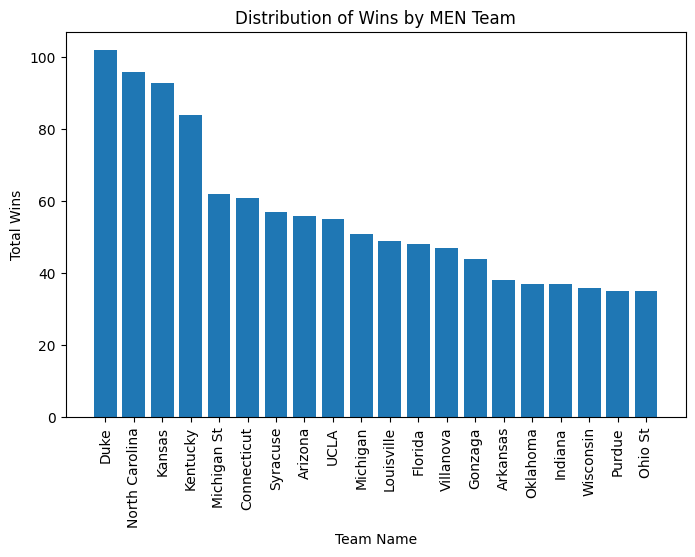

In [ ]:
# Distribution of Wins by MEN Team
query = """
SELECT 
    MTeams.TeamName,
    COUNT(*) AS Wins
FROM 
    MNCAATourneyCompactResults 
JOIN 
    MTeams 
ON 
    MNCAATourneyCompactResults.WTeamID = MTeams.TeamID
GROUP BY 
    MTeams.TeamName
ORDER BY 
    Wins DESC;
"""
result = pd.read_sql_query(query, con=engine)

Top_20 = result.head(20)
plt.figure(figsize=(8, 5))
plt.bar(Top_20['TeamName'], Top_20['Wins'])
plt.xlabel('Team Name')
plt.ylabel('Total Wins')
plt.title('Distribution of Wins by MEN Team')
plt.xticks(rotation=90)
plt.show()


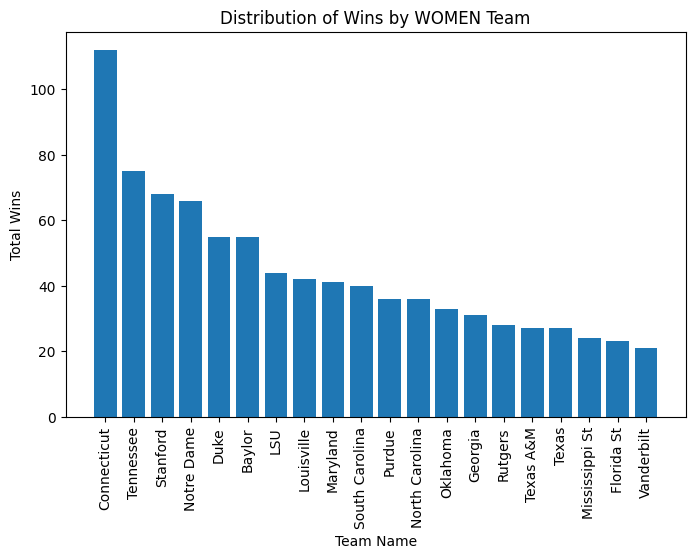

In [ ]:
# Distribution of Wins by WOMEN Team
query = """
SELECT 
    WTeams.TeamName,
    COUNT(*) AS Wins
FROM 
    WNCAATourneyCompactResults 
JOIN 
    WTeams 
ON 
    WNCAATourneyCompactResults.WTeamID = WTeams.TeamID
GROUP BY 
    WTeams.TeamName
ORDER BY 
    Wins DESC;
"""
result = pd.read_sql_query(query, con=engine)

Top_20 = result.head(20)
plt.figure(figsize=(8, 5))
plt.bar(Top_20['TeamName'], Top_20['Wins'])
plt.xlabel('Team Name')
plt.ylabel('Total Wins')
plt.title('Distribution of Wins by WOMEN Team')
plt.xticks(rotation=90)
plt.show()


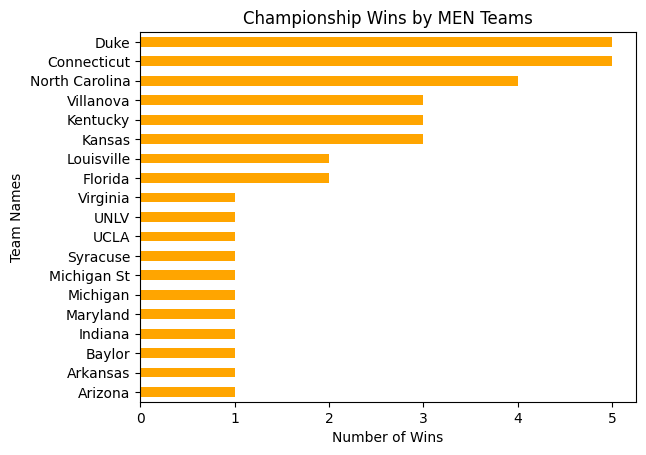

In [ ]:
# Distribution of Championsip Wins by MEN Teams
Mquery = """
SELECT 
    MTeams.TeamName,
    COUNT(*) AS Wins
FROM 
    MTeams
JOIN 
    MNCAATourneyCompactResults 
ON 
    MTeams.TeamID = MNCAATourneyCompactResults.WTeamID
WHERE
    MNCAATourneyCompactResults.DayNum = '154'
GROUP BY 
    MTeams.TeamName
ORDER BY Wins DESC;
"""
Mresult = pd.read_sql_query(Mquery, con=engine)

Mresult.plot(kind='barh', x='TeamName', y='Wins', color='orange', legend=False)
plt.gca().invert_yaxis()
plt.title('Championship Wins by MEN Teams')
plt.xlabel('Number of Wins')
plt.ylabel('Team Names')

plt.show()

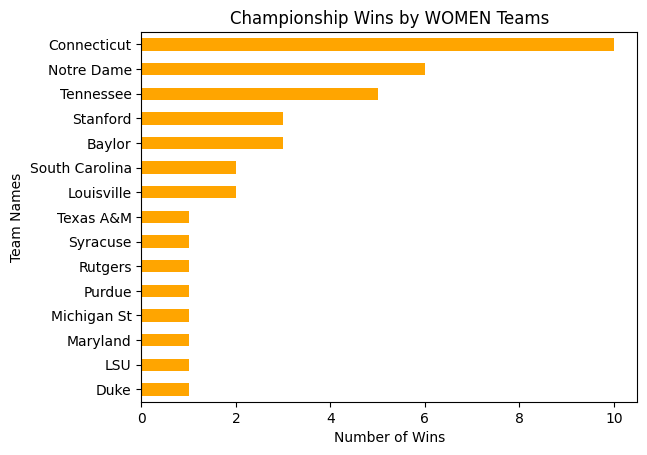

In [9]:
# Distribution of Championship Wins by WOMEN Teams
Wquery = """
SELECT 
    WTeams.TeamName,
    COUNT(*) AS Wins
FROM 
    WTeams
JOIN 
    WNCAATourneyCompactResults 
ON 
    WTeams.TeamID = WNCAATourneyCompactResults.WTeamID
WHERE
    WNCAATourneyCompactResults.DayNum = '153'
GROUP BY 
    WTeams.TeamName
ORDER BY Wins DESC;
"""
Wresult = pd.read_sql_query(Wquery, con=engine)

Wresult.plot(kind='barh', x='TeamName', y='Wins', color='orange', legend=False)
plt.gca().invert_yaxis()
plt.title('Championship Wins by WOMEN Teams')
plt.xlabel('Number of Wins')
plt.ylabel('Team Names')

plt.show()

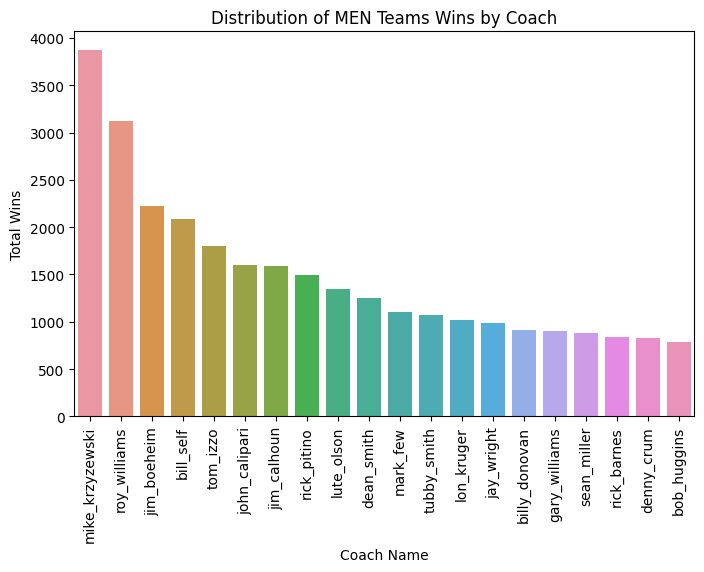

,CoachName,Wins
0,mike_krzyzewski,3876
1,roy_williams,3123
2,jim_boeheim,2223
3,bill_self,2084
4,tom_izzo,1798
5,john_calipari,1600
6,jim_calhoun,1586
7,rick_pitino,1491
8,lute_olson,1344
9,dean_smith,1248


In [10]:
# Distribution of MEN Teams win by Coach

query = """
SELECT 
    MTeamCoaches.CoachName,
    COUNT(*) AS Wins
FROM 
    MNCAATourneyCompactResults 
JOIN 
    MTeamCoaches 
ON 
    MNCAATourneyCompactResults.WTeamID = MTeamCoaches.TeamID
GROUP BY 
    MTeamCoaches.CoachName
ORDER BY 
    Wins DESC;
"""
result = pd.read_sql_query(query, con=engine)
Top_20 = result.head(20)

plt.figure(figsize=(8, 5))
sns.barplot(data=Top_20, x='CoachName', y='Wins')
plt.xlabel('Coach Name')
plt.ylabel('Total Wins')
plt.title('Distribution of MEN Teams Wins by Coach')
plt.xticks(rotation=90)

plt.show()
Top_20

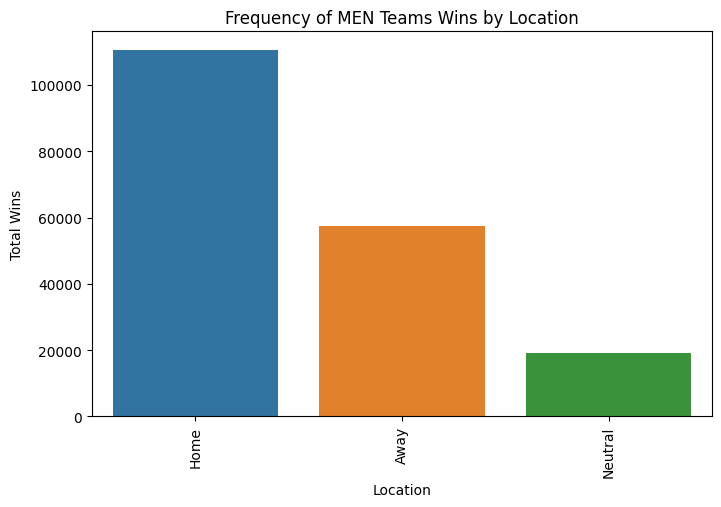

In [11]:
# Location Factor for MEN Team
query = """
SELECT
    WLoc AS Location,
    COUNT(*) AS Wins
FROM
    MRegularSeasonCompactResults
GROUP BY
    Location
ORDER BY Wins DESC;
"""
result = pd.read_sql_query(query, con=engine)
result.at[0, 'Location'] = 'Home'
result.at[1, 'Location'] = 'Away'
result.at[2, 'Location'] = 'Neutral'

plt.figure(figsize=(8, 5))
sns.barplot(result, x='Location', y='Wins')
plt.xlabel('Location')
plt.ylabel('Total Wins')
plt.title('Frequency of MEN Teams Wins by Location')
plt.xticks(rotation=90)

plt.show()

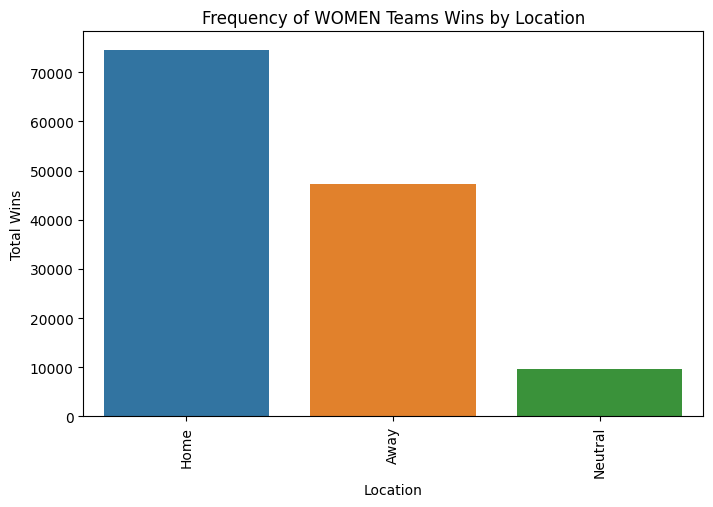

In [12]:
# Location Factor for WOMEN Team
query = """
SELECT
    WLoc AS Location,
    COUNT(*) AS Wins
FROM
    WRegularSeasonCompactResults
GROUP BY
    Location
ORDER BY Wins DESC;
"""
result = pd.read_sql_query(query, con=engine)
result.at[0, 'Location'] = 'Home'
result.at[1, 'Location'] = 'Away'
result.at[2, 'Location'] = 'Neutral'

plt.figure(figsize=(8, 5))
sns.barplot(result, x='Location', y='Wins')
plt.xlabel('Location')
plt.ylabel('Total Wins')
plt.title('Frequency of WOMEN Teams Wins by Location')
plt.xticks(rotation=90)

plt.show()

**DATA MANIPULATION**

> TRAINING DATA

In [13]:
# train
query = """
SELECT 
    *
FROM
    MRegularSeasonDetailedResults AS r
ORDER BY
    Season, WTeamID;
"""
df_fullW= pd.read_sql_query(query, con=engine)
df_fullW = df_fullW.drop(columns = [ 'DayNum', 'WLoc', 'NumOT', 'WScore', 'LScore'])
df_meanW = df_fullW.groupby(['Season', 'WTeamID']).mean().reset_index()
df_meanW = df_meanW.drop(columns = [col for col in df_meanW.columns if col.startswith('L')])
df_meanW = df_meanW.astype(int) 

In [14]:
# train
query = """
SELECT 
    r.*
FROM
    MRegularSeasonDetailedResults AS r
ORDER BY
    Season, LTeamID;
"""
df_fullL= pd.read_sql_query(query, con=engine)
df_fullL = df_fullL.drop(columns = [ 'DayNum', 'WLoc', 'NumOT', 'WScore', 'LScore'])
df_meanL= df_fullL.groupby(['Season', 'LTeamID']).mean().reset_index()
df_meanL = df_meanL.drop(columns = [col for col in df_meanL.columns if col.startswith('W')]) 
df_meanL = df_meanL.astype(int)

In [15]:
query = """
SELECT 
    MTeamCoaches.CoachName,
    COUNT(*) AS Wins
FROM 
    MNCAATourneyCompactResults 
JOIN 
    MTeamCoaches 
ON 
    MNCAATourneyCompactResults.WTeamID = MTeamCoaches.TeamID
AND 
    MNCAATourneyCompactResults.Season = MTeamCoaches.Season
GROUP BY 
    MTeamCoaches.CoachName
ORDER BY 
    Wins DESC;
"""
result = pd.read_sql_query(query, con=engine)

In [16]:
#train
query = """
SELECT
    c.coachname AS LCoachName, r.LTeamID, r.WTeamID, r.Season, r.DayNum
FROM
    MTeamCoaches AS c
JOIN 
    MNCAATourneyCompactResults AS r
ON
    c.season = r.season AND c.TeamID = r.LTeamID
WHERE 
    r.Season BETWEEN 2003 AND 2023
ORDER BY
    r.Season, r.DayNum;
"""
df_coachL = pd.read_sql_query(query, con=engine)
df_coachL

,LCoachName,LTeamID,WTeamID,Season,DayNum
0,ronnie_courtney,1411,1421,2003,134
1,tom_brennan,1436,1112,2003,136
2,john_calipari,1272,1113,2003,136
3,dana_altman,1166,1141,2003,136
4,herb_sendek,1301,1143,2003,136
...,...,...,...,...,...
1316,rodney_terry,1400,1274,2023,146
1317,greg_mcdermott,1166,1361,2023,146
1318,jim_larranaga,1274,1163,2023,152
1319,dusty_may,1194,1361,2023,152


In [17]:
# train
query = """
SELECT
    s.seed AS LSeed, r.LTeamID, r.Season, r.DayNum
FROM
    MNCAATourneyCompactResults AS r
JOIN 
    MNCAATourneySeeds AS s
ON
    s.season = r.season AND s.TeamID = r.LTeamID
ORDER BY
    r.Season, r.DayNum;
"""
df1 = pd.read_sql_query(query, con=engine)
df1['Season'] = df1['Season'].astype(int)
df_coachL['Season'] = df_coachL['Season'].astype(int)

df1['LTeamID'] = df1['LTeamID'].astype(str)
df_coachL['LTeamID'] = df_coachL['LTeamID'].astype(str)

df_coachL = df_coachL.drop_duplicates(subset=['LTeamID', 'Season', 'DayNum'])


df_merged = pd.merge(df1, df_coachL, on=['LTeamID', 'Season'], how='inner')
df_merged = df_merged.drop_duplicates()

df1 = df_merged[['LSeed', 'LCoachName']]
df1

,LSeed,LCoachName
0,X16a,ronnie_courtney
1,Z16,tom_brennan
2,Z07,john_calipari
3,Z06,dana_altman
4,W09,herb_sendek
...,...,...
1310,Y02,chris_beard
1311,X06,greg_mcdermott
1312,Y05,jim_larranaga
1313,W09,dusty_may


In [18]:
#train
query = """
SELECT
    c.coachname AS WCoachName, r.WTeamID, r.Season, r.DayNum
FROM
    MTeamCoaches AS c
JOIN 
    MNCAATourneyCompactResults AS r
ON
    c.season = r.season AND c.TeamID = r.WTeamID
ORDER BY
    r.Season, r.DayNum;
"""
df_coachW = pd.read_sql_query(query, con=engine)

In [19]:

query = """
SELECT
    s.seed AS WSeed, r.WTeamID, r.Season, r.DayNum
FROM
    MNCAATourneyCompactResults AS r
JOIN 
    MNCAATourneySeeds AS s
ON
    s.season = r.season AND s.TeamID = r.WTeamID
WHERE
    r.season BETWEEN 2003 AND 2023
ORDER BY
    r.Season, r.DayNum;
"""
df2 = pd.read_sql_query(query, con=engine)
df_coachW['WTeamID'] = df_coachW['WTeamID'].astype(str) 
df2['WTeamID'] = df2['WTeamID'].astype(str) 

df_coachW = df_coachW.drop_duplicates(subset=['WTeamID', 'Season', 'DayNum'])

df_merged = pd.merge(df2, df_coachW, on=['WTeamID', 'Season', 'DayNum'], how='inner')
df2 = df_merged[['WSeed', 'WCoachName']]
df2

,WSeed,WCoachName
0,X16b,eddie_biedenbach
1,Z01,lute_olson
2,Z10,rob_evans
3,Z11,jay_smith
4,W08,ben_braun
...,...,...
1310,Y05,jim_larranaga
1311,X05,brian_dutcher
1312,Z04,dan_hurley
1313,X05,brian_dutcher


In [20]:
query = """
SELECT
    r.*
FROM
    MNCAATourneyDetailedResults AS r
WHERE
    r.season BETWEEN 2003 AND 2023
ORDER BY
    r.Season, r.DayNum;
"""
df3 = pd.read_sql_query(query, con=engine)
df3

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,2023,146,1274,88,1400,81,N,0,29,49,...,25,11,15,9,14,20,13,6,1,23
1311,2023,146,1361,57,1166,56,N,0,25,66,...,17,10,11,8,24,9,9,3,2,11
1312,2023,152,1163,72,1274,59,N,0,28,57,...,20,12,12,12,17,10,9,8,1,12
1313,2023,152,1361,72,1194,71,N,0,25,57,...,22,16,21,7,24,6,9,6,2,17


In [21]:
#train
df= pd.concat([df1, df2, df3], axis = 1) 
df

,LSeed,LCoachName,WSeed,WCoachName,Season,DayNum,WTeamID,WScore,LTeamID,LScore,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,X16a,ronnie_courtney,X16b,eddie_biedenbach,2003,134,1421,92,1411,84,...,31,14,31,17,28,16,15,5,0,22
1,Z16,tom_brennan,Z01,lute_olson,2003,136,1112,80,1436,51,...,16,7,7,8,26,12,17,10,3,15
2,Z07,john_calipari,Z10,rob_evans,2003,136,1113,84,1272,71,...,28,14,21,20,22,11,12,2,5,18
3,Z06,dana_altman,Z11,jay_smith,2003,136,1141,79,1166,73,...,17,12,17,14,17,20,21,6,6,21
4,W09,herb_sendek,W08,ben_braun,2003,136,1143,76,1301,74,...,21,15,20,10,26,16,14,5,8,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,Y02,chris_beard,Y05,jim_larranaga,2023,146,1274,88,1400,81,...,25,11,15,9,14,20,13,6,1,23
1311,X06,greg_mcdermott,X05,brian_dutcher,2023,146,1361,57,1166,56,...,17,10,11,8,24,9,9,3,2,11
1312,Y05,jim_larranaga,Z04,dan_hurley,2023,152,1163,72,1274,59,...,20,12,12,12,17,10,9,8,1,12
1313,W09,dusty_may,X05,brian_dutcher,2023,152,1361,72,1194,71,...,22,16,21,7,24,6,9,6,2,17


In [25]:
#train
swap_proportion = 0.6
num_swaps = int(len(df) * swap_proportion)
np.random.seed(42)
swap_indices = np.random.choice(df.index, size=num_swaps, replace=False)

column_pairs = [
    ('WSeed', 'LSeed'), ('WCoachName', 'LCoachName'),
    ('WTeamID', 'LTeamID'),
    ('WFGM', 'LFGM'), ('WFGA', 'LFGA'),
    ('WFGM3', 'LFGM3'), ('WFGA3', 'LFGA3'),
    ('WFTM', 'LFTM'), ('WFTA', 'LFTA'),
    ('WOR', 'LOR'), ('WDR', 'LDR'),
    ('WAst', 'LAst'), ('WTO', 'LTO'),
    ('WStl', 'LStl'), ('WBlk', 'LBlk'),
    ('WPF', 'LPF')
]
# Copy the original DataFrame
df = df.copy()

# Loop through each pair of columns and perform the swap
for col1, col2 in column_pairs:
    df.loc[swap_indices, [col1, col2]] = df.loc[swap_indices, [col2, col1]].values
df = df.rename(columns={'WTeamID': 'Team1_ID', 'LTeamID': 'Team2_ID'})


df = df.drop(columns=['WLoc', 'NumOT', 'WScore', 'LScore'])
df = df.rename(columns={col: col.replace('W', 'Team1_') for col in df.columns if col.startswith('W')})
df = df.rename(columns={col: col.replace('L', 'Team2_') for col in df.columns if col.startswith('L')})

df = pd.DataFrame(df)

In [26]:
#train
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)

df3 = pd.concat([df1[['LSeed']], df2[['WSeed']], df3[[ 'WTeamID', 'LTeamID', 'WScore', 'LScore']]], axis=1)
final_df = pd.concat([df, df3], axis = 1)

In [27]:
#train
desired_order =[ 'Season', 'DayNum', 'Team1_ID', 'Team1_Seed', 'Team1_CoachName', 'Team1_FGM', 'Team1_FGA', 'Team1_FGM3','Team1_FGA3',
                'Team1_FTM', 'Team1_FTA', 'Team1_OR', 'Team1_DR','Team1_Ast', 'Team1_TO', 'Team1_Stl', 'Team1_Blk', 'Team1_PF', 
                'Team2_ID', 'Team2_Seed', 'Team2_CoachName','Team2_FGM', 'Team2_FGA', 'Team2_FGM3', 'Team2_FGA3', 'Team2_FTM',
                'Team2_FTA', 'Team2_OR', 'Team2_DR', 'Team2_Ast', 'Team2_TO','Team2_Stl', 'Team2_Blk', 'Team2_PF',
                'WSeed', 'LSeed', 'WTeamID', 'LTeamID', 'WScore', 'LScore']


final_df= final_df[desired_order]
final_df.isnull().sum()
final_df.drop(columns = ['WSeed', 'LSeed'], inplace = True)
final_df[['Team1_ID', 'Team2_ID', 'WTeamID', 'LTeamID']] = final_df[['Team1_ID', 'Team2_ID', 'WTeamID', 'LTeamID']].astype('object')
final_df.dropna().reset_index()

final_df

,Season,DayNum,Team1_ID,Team1_Seed,Team1_CoachName,Team1_FGM,Team1_FGA,Team1_FGM3,Team1_FGA3,Team1_FTM,...,Team2_DR,Team2_Ast,Team2_TO,Team2_Stl,Team2_Blk,Team2_PF,WTeamID,LTeamID,WScore,LScore
0,2003,134,1411,X16a,ronnie_courtney,29,67,12,31,14,...,30,17,12,5,3,22,1421,1411,92,84
1,2003,136,1112,Z01,lute_olson,31,66,7,23,11,...,26,12,17,10,3,15,1112,1436,80,51
2,2003,136,1272,Z07,john_calipari,25,69,7,28,14,...,27,18,9,7,4,19,1113,1272,84,71
3,2003,136,1166,Z06,dana_altman,27,60,7,17,12,...,20,15,18,13,1,19,1141,1166,79,73
4,2003,136,1143,W08,ben_braun,27,64,7,20,15,...,26,16,14,5,8,19,1143,1301,76,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,2023,146,1400,Y02,chris_beard,30,60,10,25,11,...,19,11,12,9,1,14,1274,1400,88,81
1311,2023,146,1166,X06,greg_mcdermott,22,55,2,17,10,...,23,6,7,1,3,11,1361,1166,57,56
1312,2023,152,1163,Z04,dan_hurley,28,57,9,26,7,...,17,10,9,8,1,12,1163,1274,72,59
1313,2023,152,1361,X05,brian_dutcher,25,57,9,18,13,...,24,6,9,6,2,17,1361,1194,72,71


In [28]:
# First Round
query = """
SELECT
    sl.season, sl.Strongseed AS Team1_Seed, sl.weakseed AS Team2_Seed,
    s.TeamID AS WTeamID
FROM
    MNCAATourneySlots AS sl
JOIN
    MNCAATourneySeeds AS s
ON
    s.seed = sl.strongseed AND s.season = sl.season
WHERE
    sl.Season = 2024
    AND (sl.strongseed NOT LIKE '%a' AND sl.weakseed NOT LIKE '%b')
    AND sl.strongseed NOT LIKE 'R%';
"""
df_fx = pd.read_sql_query(query, con=engine)
df_fx

,Season,Team1_Seed,Team2_Seed,WTeamID
0,2024,W01,W16,1163
1,2024,W02,W15,1235
2,2024,W03,W14,1228
3,2024,W04,W13,1120
4,2024,W05,W12,1361
5,2024,W06,W11,1140
6,2024,W07,W10,1450
7,2024,W08,W09,1194
8,2024,X01,X16,1314
9,2024,X02,X15,1112


In [29]:
# First Round
query = """
SELECT
    s.TeamID AS LTeamID, s.season, sl.weakseed AS Team2_Seed
FROM
    MNCAATourneySlots AS sl
JOIN
    MNCAATourneySeeds AS s
ON
    s.seed = sl.Weakseed AND s.season = sl.season
WHERE
    sl.Season = 2024
    AND sl.strongseed NOT LIKE 'R%';
"""
df_fy= pd.read_sql_query(query, con=engine)
last_four_indices = df_fy.index[-4:]
df_fy.loc[last_four_indices, 'Team2_Seed'] = df_fy.loc[last_four_indices, 'Team2_Seed'].str.rstrip('b')

df_fy

,LTeamID,Season,Team2_Seed
0,1391,2024,W16
1,1355,2024,W15
2,1287,2024,W14
3,1463,2024,W13
4,1412,2024,W12
5,1182,2024,W11
6,1179,2024,W10
7,1321,2024,W09
8,1253,2024,X15
9,1159,2024,X14


In [30]:
query = """
SELECT
    c.TeamID AS LTeamID, s.season, c.TeamID AS WTeamID, c.coachname
FROM
    MTeamCoaches AS c
JOIN
    MNCAATourneySeeds AS s
ON
    s.TeamID = c.TeamID AND s.season = c.season
WHERE
    s.Season = 2024;
"""
df_c= pd.read_sql_query(query, con=engine)
df_c

,LTeamID,Season,WTeamID,CoachName
0,1103,2024,1103,john_groce
1,1104,2024,1104,nate_oats
2,1112,2024,1112,tommy_lloyd
3,1120,2024,1120,bruce_pearl
4,1124,2024,1124,scott_drew
...,...,...,...,...
63,1443,2024,1443,steve_lutz
64,1447,2024,1447,donald_copeland
65,1450,2024,1450,kyle_smith
66,1458,2024,1458,greg_gard


In [31]:
# First Round
df_fa = pd.merge(df_fx, df_fy, on=['Season', 'Team2_Seed'], how='left')
df_fa = pd.merge(df_fa, df_meanW, on=['Season', 'WTeamID'], how='inner')
df_fa = pd.merge(df_fa, df_meanL, on=['Season', 'LTeamID'], how='left')
df_fa = pd.merge(df_fa, df_c, on=['Season', 'WTeamID'], how='left').rename(columns = {'CoachName':'WCoachName', 'LTeamID_y': 'LTeamID' })
df_fa = pd.merge(df_fa, df_c, on=['Season', 'LTeamID'], how='left').rename(columns = {'CoachName':'LCoachName', 'WTeamID_x': 'WTeamID'})
df_fa.drop(columns = ['LTeamID_x', 'WTeamID_y'], inplace = True)
df_fa.rename(columns = {'WTeamID':'Team1_ID', 'LTeamID': 'Team2_ID'}, inplace = True)


df_fa['DayNum'] = [
    136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136, 136,136,
    137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137
]

df_fa = df_fa.rename(columns={col: col.replace('W', 'Team1_') for col in df_fa.columns if col.startswith('W')})
df_fa = df_fa.rename(columns={col: col.replace('L', 'Team2_') for col in df_fa.columns if col.startswith('L')})

desired_order =[ 'Season', 'DayNum', 'Team1_ID', 'Team1_Seed', 'Team1_CoachName', 'Team1_FGM', 'Team1_FGA', 'Team1_FGM3','Team1_FGA3',
                'Team1_FTM', 'Team1_FTA', 'Team1_OR', 'Team1_DR','Team1_Ast', 'Team1_TO', 'Team1_Stl', 'Team1_Blk', 'Team1_PF', 
                'Team2_ID', 'Team2_Seed', 'Team2_CoachName','Team2_FGM', 'Team2_FGA', 'Team2_FGM3', 'Team2_FGA3', 'Team2_FTM',
                'Team2_FTA', 'Team2_OR', 'Team2_DR', 'Team2_Ast', 'Team2_TO','Team2_Stl', 'Team2_Blk', 'Team2_PF']


df_fa= df_fa[desired_order]
df_fa.columns

Index(['Season', 'DayNum', 'Team1_ID', 'Team1_Seed', 'Team1_CoachName',
       'Team1_FGM', 'Team1_FGA', 'Team1_FGM3', 'Team1_FGA3', 'Team1_FTM',
       'Team1_FTA', 'Team1_OR', 'Team1_DR', 'Team1_Ast', 'Team1_TO',
       'Team1_Stl', 'Team1_Blk', 'Team1_PF', 'Team2_ID', 'Team2_Seed',
       'Team2_CoachName', 'Team2_FGM', 'Team2_FGA', 'Team2_FGM3', 'Team2_FGA3',
       'Team2_FTM', 'Team2_FTA', 'Team2_OR', 'Team2_DR', 'Team2_Ast',
       'Team2_TO', 'Team2_Stl', 'Team2_Blk', 'Team2_PF'],
      dtype='object')